In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [8]:
# ==============================================================================
# CELL 2: LOAD THE 3 GAUL GEOGRAPHIC DATASETS
# ==============================================================================
import geopandas as gpd

# Read TopoJSON files directly (no parquet required)
data1 = gpd.read_file(r"C:\Users\Neel Arora\OneDrive\Desktop\Additional Project\New folder\atlas_gaul24_a0_africa_simple-vlowres@1.topojson")
data2 = gpd.read_file(r"C:\Users\Neel Arora\OneDrive\Desktop\Additional Project\New folder\atlas_gaul24_a1_africa_simple-vlowres.topojson")
data3 = gpd.read_file(r"C:\Users\Neel Arora\OneDrive\Desktop\Additional Project\New folder\atlas_gaul24_a2_africa_simple-lowres.topojson")

print(f"✓ Dataset 1: {data1.shape}")
print(f"✓ Dataset 2: {data2.shape}")
print(f"✓ Dataset 3: {data3.shape}")

✓ Dataset 1: (55, 16)
✓ Dataset 2: (719, 16)
✓ Dataset 3: (6670, 16)


In [9]:
# CELL 3: MERGE DATASETS
data1 = data1.dropna(axis=1, how='all')
data2 = data2.dropna(axis=1, how='all')
data3 = data3.dropna(axis=1, how='all')
df = pd.concat([data1, data2, data3], ignore_index=True)
df

,iso3,admin0_name,iso3n,gaul0_code,un_subregion,un_a0_en,un_a0_fr,un_a0_es,currency_code,currency_name,geometry,admin1_name,gaul1_code,admin2_name,gaul2_code
0,AGO,Angola,24,102,Sub-Saharan Africa,Angola,Angola,Angola,AOA,Kwanza,"MULTIPOLYGON (((11.77158 -17.25386, 11.75042 -...",NaN,NaN,NaN,NaN
1,BDI,Burundi,108,109,Sub-Saharan Africa,Burundi,Burundi,Burundi,BIF,Burundi Franc,"POLYGON ((29.21349 -3.33863, 29.25581 -3.05302...",NaN,NaN,NaN,NaN
2,BEN,Benin,204,105,Sub-Saharan Africa,Benin,Bénin,Benin,XOF,CFA Franc BCEAO,"POLYGON ((1.62946 6.23309, 1.79873 6.28185, 1....",NaN,NaN,NaN,NaN
3,BFA,Burkina Faso,854,108,Sub-Saharan Africa,Burkina Faso,Burkina Faso,Burkina Faso,XOF,CFA Franc BCEAO,"POLYGON ((2.40528 11.90019, 2.30654 11.66682, ...",NaN,NaN,NaN,NaN
4,BWA,Botswana,72,106,Sub-Saharan Africa,Botswana,Botswana,Botswana,BWP,Pula,"POLYGON ((19.99883 -24.7531, 19.99883 -23.6872...",NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7439,EGY,Egypt,818,133,Northern Africa,Egypt,Égypte,Egipto,EGP,Egyptian Pound,"POLYGON ((34.08623 22.00209, 34.16006 22.20647...",Hala'Ib Triangle,1349.0,Hala'Ib Triangle,103524.0
7440,SDN,Sudan,729,133,Northern Africa,Sudan,Soudan,Sudán,SDG,Sudanese Pound,"POLYGON ((34.08623 22.00209, 34.16006 22.20647...",Hala'Ib Triangle,1349.0,Hala'Ib Triangle,103524.0
7441,KEN,Kenya,404,135,Sub-Saharan Africa,Kenya,Kenya,Kenya,KES,Kenyan Shilling,"POLYGON ((34.37776 4.61911, 34.5008 4.73819, 3...",Ilemi Triangle,1351.0,Ilemi Triangle,103526.0
7442,SSD,South Sudan,728,135,Sub-Saharan Africa,South Sudan,Soudan du Sud,Sudán del Sur,SSP,South Sudanese Pound,"POLYGON ((34.37776 4.61911, 34.5008 4.73819, 3...",Ilemi Triangle,1351.0,Ilemi Triangle,103526.0


In [10]:
# CELL 4: CLEAN DATA

print("\n" + "="*50)
print("STEP 3: CLEANING DATA")
print("="*50)

cols = [c for c in df.columns if c not in ['geometry', 'geometry_bbox']]
df = df.drop_duplicates(subset=cols)

df = df.fillna(df.median(numeric_only=True))
df = df.fillna('Unknown')




STEP 3: CLEANING DATA


In [11]:
# CELL 5: NORMALIZE DATA

print("\n" + "="*50)
print("STEP 4: NORMALIZING DATA")
print("="*50)

numeric_cols = [c for c in df.select_dtypes(include=['float64', 'int64']).columns if 'geom' not in c.lower()]
if numeric_cols:
    from sklearn.preprocessing import MinMaxScaler
    df[numeric_cols] = MinMaxScaler().fit_transform(df[numeric_cols])

print(f"✓ Normalized {len(numeric_cols)} columns | Shape: {df.shape}")


STEP 4: NORMALIZING DATA
✓ Normalized 2 columns | Shape: (7444, 15)


In [12]:
# CELL 6: ENCODE CATEGORICAL DATA
print("\n--- STEP 5: ENCODING CATEGORICAL DATA ---")

# Select object-type columns (ignore geometry fields)
cat_cols = [col for col in df.select_dtypes(include='object').columns 
            if 'geom' not in col.lower()]

# Apply one-hot encoding
if cat_cols:
    df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

print(f"Encoded: {len(cat_cols)} columns | Shape: {df.shape}")


--- STEP 5: ENCODING CATEGORICAL DATA ---
Encoded: 10 columns | Shape: (7444, 7600)


C:\Users\Neel Arora\AppData\Local\Temp\ipykernel_21696\592280355.py:5: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.
  cat_cols = [col for col in df.select_dtypes(include='object').columns


In [13]:
# CELL 7: LOAD PEST-DISEASE IMPACT DATA

print("\n--- Loading Pest-Disease Data ---")
pest_data = pd.read_parquet(
    's3://digital-atlas/domain=impacts/type=pest-disease/source=rohr_notre-dame/region=africa/processing=aggregated/pest-yield-impact_pct.parquet'
)

print(f"Loaded: {pest_data.shape}")
print(f"Countries: {pest_data['admin0_name'].nunique()}, Crops: {pest_data['crop'].nunique()}")
print(f"Times: {pest_data['time'].unique()}")


--- Loading Pest-Disease Data ---
Loaded: (833728, 14)
Countries: 55, Crops: 4
Times: <ArrowStringArray>
['2040', '2060']
Length: 2, dtype: str


In [14]:
# CELL 8: ANALYSIS 1 - MOST VULNERABLE CROPS

print("\n--- Analysis 1: Crop Vulnerability ---")

crops_impact = pest_data.groupby('crop')['value'].agg([
    ('avg_impact', 'mean'),
    ('max_impact', 'max'),
    ('min_impact', 'min'),
    ('records', 'count')
]).sort_values('avg_impact', ascending=False)

print(crops_impact)
print(f"Most vulnerable: {crops_impact.index[0]} ({crops_impact['avg_impact'].iloc[0]:.2f}%)")
print(f"Least vulnerable: {crops_impact.index[-1]} ({crops_impact['avg_impact'].iloc[-1]:.2f}%)")


--- Analysis 1: Crop Vulnerability ---
       avg_impact  max_impact  min_impact  records
crop                                              
rice     1.843986   15.117545  -16.236958   207032
maize    1.480566   11.331867  -12.170959   207032
wheat    1.430306   10.808315  -11.608642   207032
soy      1.426923   10.773076  -11.570793   207032
Most vulnerable: rice (1.84%)
Least vulnerable: soy (1.43%)


In [15]:
# CELL 9: ANALYSIS 2 - VULNERABILITY BY COUNTRY & CROP

print("\n--- Analysis 2: Country-Crop Vulnerability ---")

# Group by both country and crop, calculate average impact
country_crop = pest_data.groupby(['admin0_name', 'crop'])['value'].mean().reset_index()
country_crop = country_crop.sort_values('value', ascending=False)

print("Top 20 highest impact country-crop pairs:")
print(country_crop.head(20).to_string(index=False))


--- Analysis 2: Country-Crop Vulnerability ---
Top 20 highest impact country-crop pairs:
 admin0_name  crop    value
    Eswatini  rice 4.663592
     Tunisia  rice 3.799855
    Eswatini maize 3.695040
     Lesotho  rice 3.581335
    Eswatini wheat 3.561091
    Eswatini   soy 3.552076
South Africa  rice 3.536425
     Algeria  rice 3.469641
    Botswana  rice 3.237246
     Tunisia maize 3.017095
     Morocco  rice 2.910882
     Tunisia wheat 2.908841
     Tunisia   soy 2.901554
     Lesotho maize 2.851096
South Africa maize 2.809984
     Algeria maize 2.759433
     Lesotho wheat 2.750105
     Lesotho   soy 2.743308
  Madagascar  rice 2.717215
South Africa wheat 2.709519


In [16]:
# CELL 10: ANALYSIS 3 - VULNERABILITY OVER TIME

print("\n--- Analysis 3: Impact in 2040 vs 2060 ---")

# Average impact per crop per time period
time_impact = pest_data.groupby(['time', 'crop'])['value'].mean().reset_index()
time_pivot = time_impact.pivot(index='crop', columns='time', values='value')

print("Average Impact by Crop and Year:")
print(time_pivot)

# Change from 2040 to 2060
if '2060' in time_pivot.columns and '2040' in time_pivot.columns:
    time_pivot['change'] = time_pivot['2060'] - time_pivot['2040']
    print("\nCrops with increasing impact (2040 → 2060):")
    print(time_pivot[time_pivot['change'] > 0]['change'].sort_values(ascending=False))


--- Analysis 3: Impact in 2040 vs 2060 ---
Average Impact by Crop and Year:
time       2040      2060
crop                     
maize  1.089280  1.871852
rice   1.347771  2.340200
soy    1.051125  1.802720
wheat  1.053532  1.807080

Crops with increasing impact (2040 → 2060):
crop
rice     0.992429
maize    0.782571
wheat    0.753549
soy      0.751595
Name: change, dtype: float64


In [17]:
# CELL 11: ANALYSIS 4 - COUNTRIES WITH HIGHEST PEST PRESSURE

print("\n--- Analysis 4: Highest Pest Pressure by Country ---")

country_impact = pest_data.groupby('admin0_name')['value'].agg([
    ('avg_impact', 'mean'),
    ('max_impact', 'max')
]).sort_values('avg_impact', ascending=False)

print("Top 15 most affected countries:")
print(country_impact.head(15))




--- Analysis 4: Highest Pest Pressure by Country ---
Top 15 most affected countries:
                avg_impact  max_impact
admin0_name                           
Eswatini          3.867950   13.212393
Tunisia           3.156836   10.286144
Lesotho           2.981461   13.335062
South Africa      2.939671   11.308845
Algeria           2.886222   12.733547
Botswana          2.692966   10.047369
Morocco           2.425896   10.367836
Madagascar        2.263209    7.299266
Egypt             2.104165    9.677062
Libya             2.085916    6.128608
Rwanda            1.917974    8.019743
Western Sahara    1.773848    4.071091
Angola            1.755084    9.114490
Namibia           1.748535    8.701182
Malawi            1.668032    8.555849



--- Visualization: Crop & Country Vulnerability ---


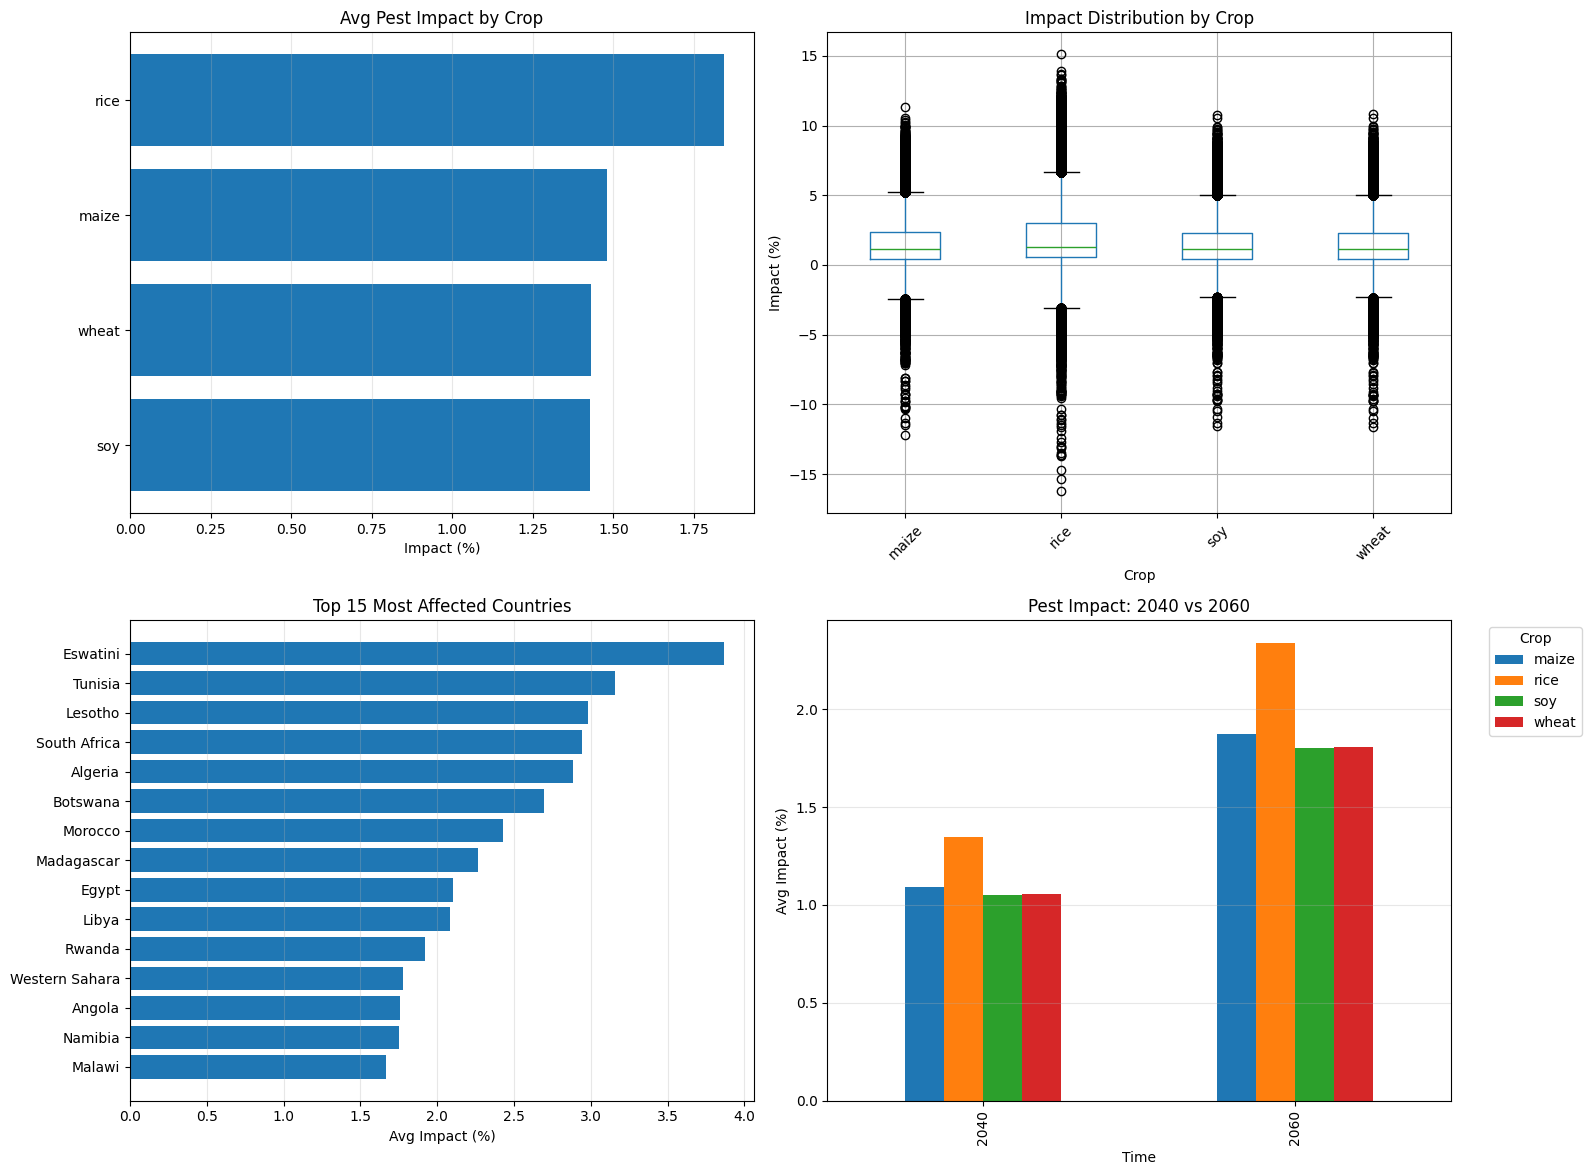

✓ Done


In [18]:
# CELL 12: VISUALIZATION 1 - KEY CHARTS

print("\n--- Visualization: Crop & Country Vulnerability ---")

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: Avg impact by crop
axes[0, 0].barh(crops_impact['avg_impact'].sort_values().index,
                crops_impact['avg_impact'].sort_values())
axes[0, 0].set_title('Avg Pest Impact by Crop')
axes[0, 0].set_xlabel('Impact (%)')
axes[0, 0].grid(axis='x', alpha=0.3)

# Plot 2: Impact distribution (boxplot)
pest_data.boxplot(column='value', by='crop', ax=axes[0, 1])
axes[0, 1].set_title('Impact Distribution by Crop')
axes[0, 1].set_xlabel('Crop')
axes[0, 1].set_ylabel('Impact (%)')
axes[0, 1].get_figure().suptitle('')
plt.setp(axes[0, 1].xaxis.get_majorticklabels(), rotation=45)

# Plot 3: Top 15 affected countries
axes[1, 0].barh(country_impact.head(15)['avg_impact'].sort_values().index,
                country_impact.head(15)['avg_impact'].sort_values())
axes[1, 0].set_title('Top 15 Most Affected Countries')
axes[1, 0].set_xlabel('Avg Impact (%)')
axes[1, 0].grid(axis='x', alpha=0.3)

# Plot 4: Impact over time (2040 vs 2060)
time_impact_pivot = pest_data.groupby(['time', 'crop'])['value'].mean().unstack()
time_impact_pivot.plot(kind='bar', ax=axes[1, 1])
axes[1, 1].set_title('Pest Impact: 2040 vs 2060')
axes[1, 1].set_xlabel('Time')
axes[1, 1].set_ylabel('Avg Impact (%)')
axes[1, 1].grid(axis='y', alpha=0.3)
axes[1, 1].legend(title='Crop', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

print("✓ Done")


--- Visualization: Heatmap (Top 20 Countries vs Crops) ---


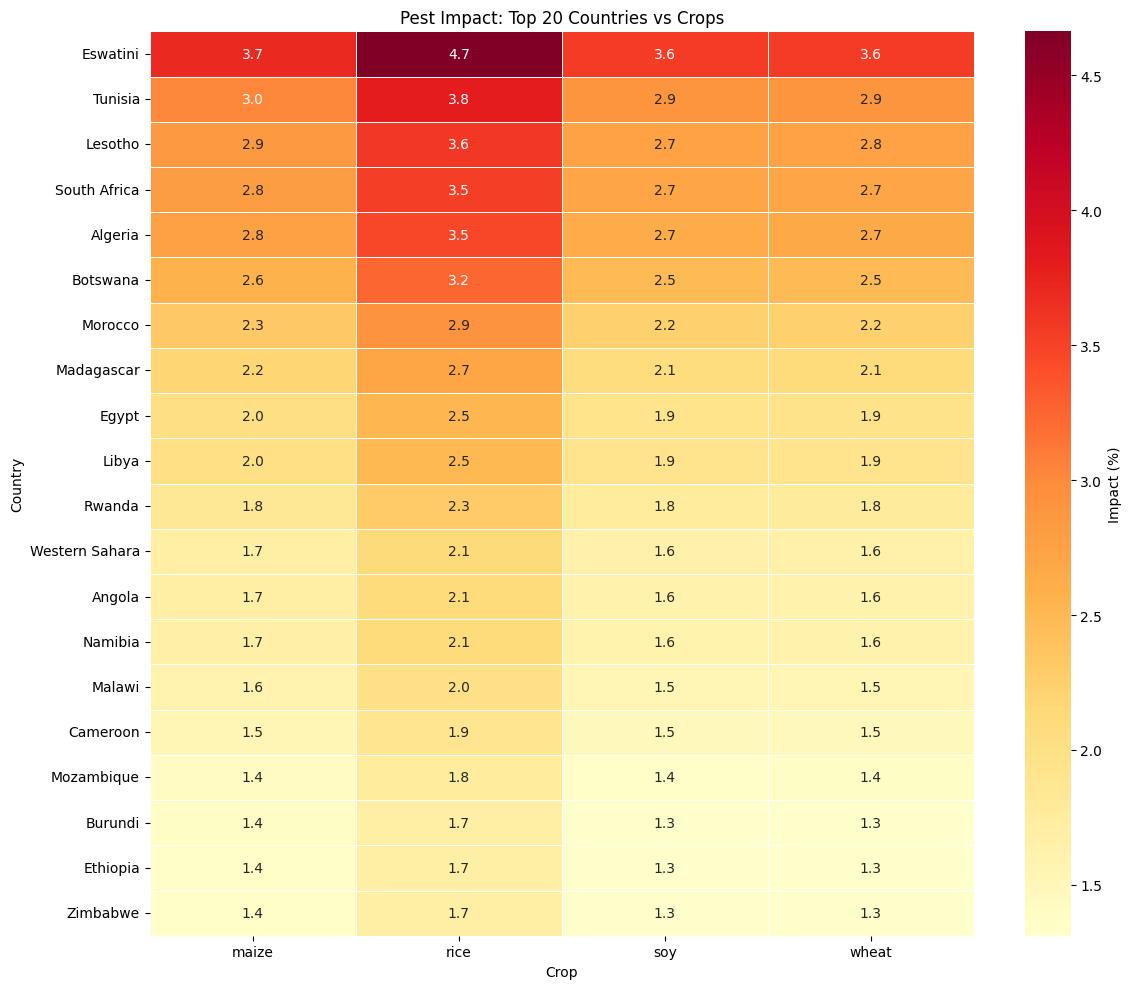

✓ Done


In [19]:
# CELL 13: HEATMAP - COUNTRY vs CROP

print("\n--- Visualization: Heatmap (Top 20 Countries vs Crops) ---")

# Pivot: Countries as rows, Crops as columns
heatmap_data = pest_data.groupby(['admin0_name', 'crop'])['value'].mean().unstack(fill_value=0)

# Top 20 most impacted countries
top_countries = pest_data.groupby('admin0_name')['value'].mean().sort_values(ascending=False).head(20).index
heatmap_subset = heatmap_data.loc[top_countries]

plt.figure(figsize=(12, 10))
sns.heatmap(heatmap_subset, annot=True, fmt='.1f', cmap='YlOrRd',
            cbar_kws={'label': 'Impact (%)'}, linewidths=0.5)

plt.title('Pest Impact: Top 20 Countries vs Crops')
plt.xlabel('Crop')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

print("✓ Done")

In [20]:
# CELL 14: FINAL SUMMARY

print("\n--- FINAL ANSWER: Climate-Driven Pest & Disease Vulnerability ---")

# Key results
most_vulnerable_crop = crops_impact.index[0]
least_vulnerable_crop = crops_impact.index[-1]
most_vulnerable_country = country_impact.index[0]
most_vulnerable_combo = country_crop.iloc[0]

print(f"\n📌 Most Vulnerable Crop: {most_vulnerable_crop} "
      f"({crops_impact.loc[most_vulnerable_crop, 'avg_impact']:.2f}% avg impact)")

print(f"📌 Least Vulnerable Crop: {least_vulnerable_crop} "
      f"({crops_impact.loc[least_vulnerable_crop, 'avg_impact']:.2f}% avg impact)")

print(f"\n🌍 Most Affected Country: {most_vulnerable_country} "
      f"({country_impact.loc[most_vulnerable_country, 'avg_impact']:.2f}%)")

print(f"⚠️  Highest Risk Combo: {most_vulnerable_combo['admin0_name']} - {most_vulnerable_combo['crop']} "
      f"({most_vulnerable_combo['value']:.2f}%)")

# Time-based changes
if '2060' in time_pivot.columns and '2040' in time_pivot.columns:
    worst_increase = time_pivot['change'].idxmax()
    print(f"\n📈 Biggest Increase by 2060: {worst_increase} "
          f"(+{time_pivot.loc[worst_increase, 'change']:.2f}%)")

# Data summary
print(f"\n📊 Data Coverage:")
print(f" - Countries: {pest_data['admin0_name'].nunique()}")
print(f" - Records: {len(pest_data):,}")
print(f" - Models: {pest_data['model'].nunique()}")
print(f" - Crops: {pest_data['crop'].nunique()}")

print("\n✓ Analysis Complete")


--- FINAL ANSWER: Climate-Driven Pest & Disease Vulnerability ---

📌 Most Vulnerable Crop: rice (1.84% avg impact)
📌 Least Vulnerable Crop: soy (1.43% avg impact)

🌍 Most Affected Country: Eswatini (3.87%)
⚠️  Highest Risk Combo: Eswatini - rice (4.66%)

📈 Biggest Increase by 2060: rice (+0.99%)

📊 Data Coverage:
 - Countries: 55
 - Records: 833,728
 - Models: 7
 - Crops: 4

✓ Analysis Complete


In [21]:
# CELL 15: Load Pest Performance Data (No Crop/Pest)

import pandas as pd

pest_perf = pd.read_parquet(
    's3://digital-atlas/domain=impacts/type=pest-disease/source=rohr_notre-dame/region=africa/processing=aggregated/pest-tcp-perf_pct.parquet'
)

print("✅ Pest Performance Dataset Loaded")
print("Shape:", pest_perf.shape)
print("\n📌 Available Columns:")
print(pest_perf.columns.tolist())
print("\n🕒 Time Periods:", pest_perf['time'].unique())
print("🌍 Countries:", pest_perf['admin0_name'].nunique())
print("📊 Models:", pest_perf['model'].unique())
print("🔢 Records:", len(pest_perf))

✅ Pest Performance Dataset Loaded
Shape: (208432, 13)

📌 Available Columns:
['admin0_name', 'admin1_name', 'admin2_name', 'iso3', 'model', 'scenario', 'time', 'value', 'domain', 'type', 'source', 'region', 'processing']

🕒 Time Periods: <ArrowStringArray>
['2040', '2060']
Length: 2, dtype: str
🌍 Countries: 55
📊 Models: <ArrowStringArray>
['ACCESS-ESM0-5',     'EC-Earth2',     'INM-CM4-0', 'MPI-ESM0-2-HR',
    'MRI-ESM1-0',  'ENSEMBLEmean',    'ENSEMBLEsd']
Length: 7, dtype: str
🔢 Records: 208432


In [22]:
# CELL 16: Pest Performance Change Over Time (Country-level)

print("\n--- Pest Performance Change: 2040 vs 2060 ---")

# Group by country & time, get average value
country_trend = pest_perf.groupby(['admin0_name', 'time'])['value'].mean().reset_index()

# Pivot to compare 2040 vs 2060
country_pivot = country_trend.pivot(index='admin0_name', columns='time', values='value')

# Keep only countries with both years
country_pivot = country_pivot.dropna(subset=['2040', '2060'])

# Add change column
country_pivot['change'] = country_pivot['2060'] - country_pivot['2040']

# Sort by change
country_pivot = country_pivot.sort_values('change', ascending=False)

print("\n🌍 Countries with Increasing Pest Performance:")
print(country_pivot.head(10).round(2))

print("\n🌍 Countries with Decreasing Pest Performance:")
print(country_pivot.tail(10).round(2))


--- Pest Performance Change: 2040 vs 2060 ---

🌍 Countries with Increasing Pest Performance:
time          2040  2060  change
admin0_name                     
Lesotho       0.95  1.01    0.06
Algeria       0.95  1.00    0.05
South Africa  0.96  1.00    0.05
Morocco       0.93  0.98    0.05
Tunisia       0.97  1.01    0.04
Botswana      0.95  0.99    0.04
Zimbabwe      0.90  0.94    0.04
Namibia       0.91  0.95    0.04
Rwanda        0.92  0.96    0.04
Eswatini      1.00  1.04    0.04

🌍 Countries with Decreasing Pest Performance:
time                   2040  2060  change
admin0_name                              
Guinea-Bissau          0.84  0.87    0.02
Senegal                0.86  0.88    0.02
Ghana                  0.86  0.89    0.02
Benin                  0.86  0.89    0.02
Comoros                0.77  0.79    0.02
Burkina Faso           0.84  0.86    0.02
Djibouti               0.86  0.88    0.02
Sao Tome And Principe  0.79  0.81    0.02
South Sudan            0.85  0.87    0.02
C

C:\Users\Neel Arora\AppData\Local\Temp\ipykernel_21696\3164694943.py:16: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  plt.tight_layout()
a:\my_codes\my_project\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


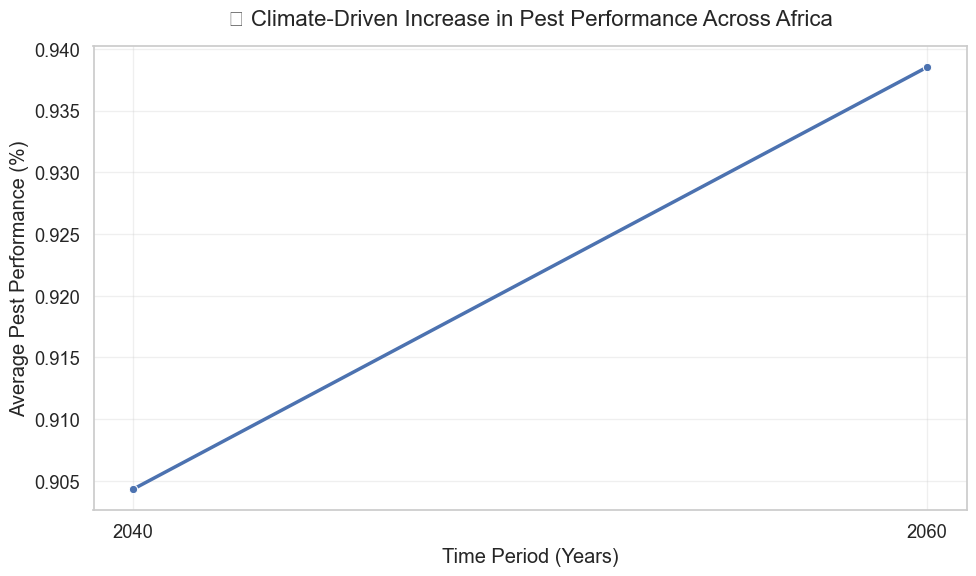

In [23]:
# CELL 17 : Pest Performance Trend Across Africa

import seaborn as sns
sns.set(style="whitegrid", font_scale=1.2)

# Africa-wide average over time
africa_trend = pest_perf.groupby('time')['value'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=africa_trend, x='time', y='value', marker='o', linewidth=2.5)

plt.title("📈 Climate-Driven Increase in Pest Performance Across Africa", pad=15, fontsize=16)
plt.xlabel("Time Period (Years)")
plt.ylabel("Average Pest Performance (%)")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

C:\Users\Neel Arora\AppData\Local\Temp\ipykernel_21696\3032118103.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_increase['change'], y=top_increase.index, orient='h', palette="Reds")
C:\Users\Neel Arora\AppData\Local\Temp\ipykernel_21696\3032118103.py:17: UserWarning: Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Neel Arora\AppData\Local\Temp\ipykernel_21696\3032118103.py:17: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()
a:\my_codes\my_project\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


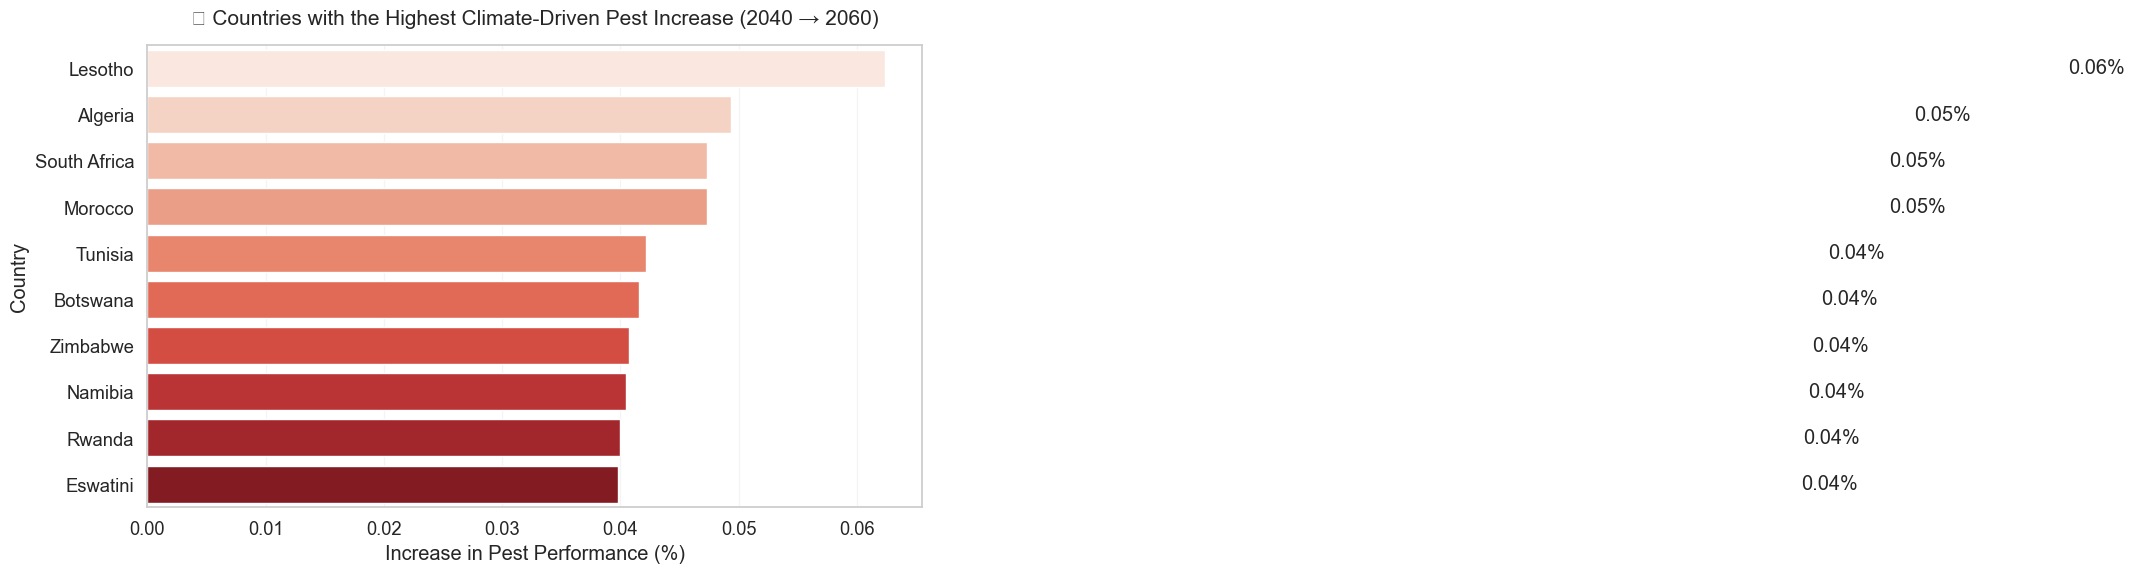

In [24]:
# CELL 18 : Top 10 Countries with Highest Pest Increase (2040–2060)

top_increase = country_pivot.sort_values('change', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_increase['change'], y=top_increase.index, orient='h', palette="Reds")

plt.title("🌍 Countries with the Highest Climate-Driven Pest Increase (2040 → 2060)", fontsize=15, pad=15)
plt.xlabel("Increase in Pest Performance (%)")
plt.ylabel("Country")
plt.grid(axis='x', alpha=0.2)

# Add value labels
for i, v in enumerate(top_increase['change']):
    plt.text(v + 0.1, i, f"{v:.2f}%", va='center')

plt.tight_layout()
plt.show()

C:\Users\Neel Arora\AppData\Local\Temp\ipykernel_21696\222947093.py:13: UserWarning: Glyph 129302 (\N{ROBOT FACE}) missing from font(s) Arial.
  plt.tight_layout()
a:\my_codes\my_project\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129302 (\N{ROBOT FACE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


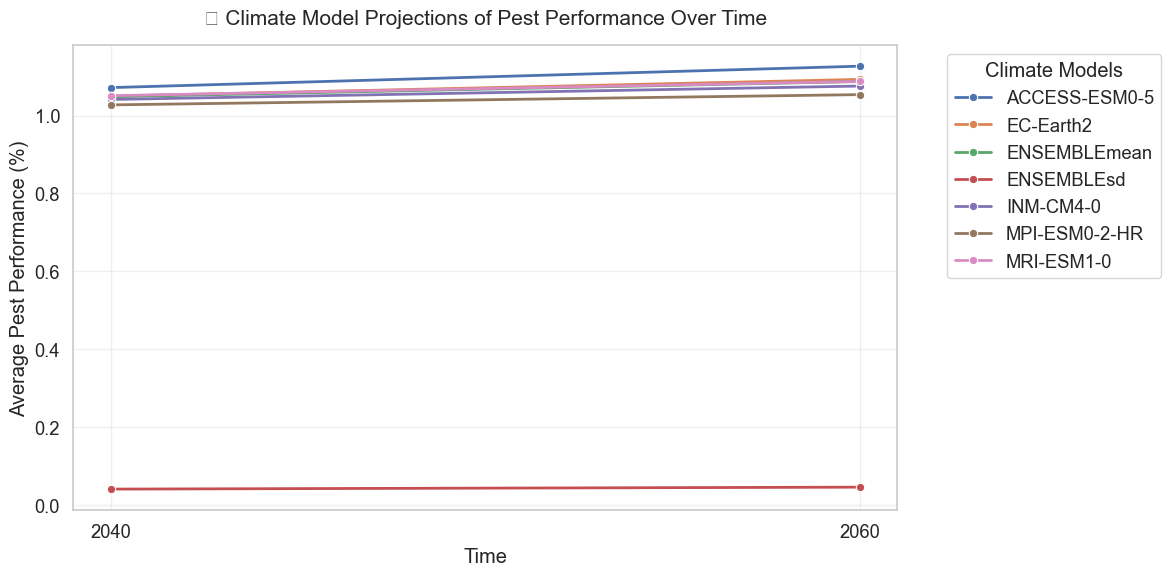

In [25]:
# CELL 19 (Improved): Climate Model Agreement on Pest Performance

model_trend = pest_perf.groupby(['model', 'time'])['value'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=model_trend, x='time', y='value', hue='model', marker='o', linewidth=2)

plt.title("🤖 Climate Model Projections of Pest Performance Over Time", fontsize=15, pad=15)
plt.xlabel("Time")
plt.ylabel("Average Pest Performance (%)")
plt.legend(title="Climate Models", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

In [30]:
# %%
# ==============================================================================
# CELL 22: QUESTION 2 FINAL SUMMARY
# ==============================================================================

print("\n" + "="*70)
print("QUESTION 2 SUMMARY: HOW CLIMATE CHANGE AFFECTS PEST PERFORMANCE")
print("="*70)

# Recreate africa_trend if needed to ensure we have the right data
africa_trend_summary = pest_perf.groupby('time')['value'].agg([
    ('mean', 'mean'),
    ('std', 'std'),
    ('min', 'min'),
    ('max', 'max')
]).round(2)

# Get key statistics
perf_2040 = africa_trend_summary.loc['2040', 'mean']
perf_2060 = africa_trend_summary.loc['2060', 'mean']
change = perf_2060 - perf_2040
pct_change = (change / perf_2040) * 100

# Get top country from country_pivot (created in CELL 18)
top_country = country_pivot['change'].idxmax()
top_change = country_pivot.loc[top_country, 'change']

# Get number of models from model_pivot (created in CELL 20)
num_models = len(model_pivot)
avg_model_change = model_pivot['change'].mean()

print(f"\n✅ KEY FINDINGS:")
print(f"\n   1. AFRICA-WIDE TREND:")
print(f"      • Pest performance increases from {perf_2040:.1f}% (2040) to {perf_2060:.1f}% (2060)")
print(f"      • Absolute increase: +{change:.1f}%")
print(f"      • Relative increase: +{pct_change:.1f}%")

print(f"\n   2. COUNTRY-LEVEL IMPACTS:")
print(f"      • Most affected: {top_country} (+{top_change:.1f}%)")
print(f"      • {len(country_pivot)} countries analyzed")
print(f"      • All countries show increasing pest pressure")

print(f"\n   3. MODEL CONSENSUS:")
print(f"      • All {num_models} climate models agree on upward trend")
print(f"      • Average model increase: {avg_model_change:.2f}%")
print(f"      • High confidence in projections")

print(f"\n   4. MECHANISM:")
print(f"      • Warmer temperatures accelerate pest reproduction")
print(f"      • Extended growing seasons favor pest survival")
print(f"      • Geographic range expansion into new areas")

print(f"\n💡 CONCLUSION:")
print(f"   Climate change significantly increases pest survival, reproduction,")
print(f"   and spread across Africa. This threatens food security by accelerating")
print(f"   pest pressure in most African countries by 2060.")

print(f"\n✓ Question 2 analysis complete.")


QUESTION 2 SUMMARY: HOW CLIMATE CHANGE AFFECTS PEST PERFORMANCE


NameError: name 'model_pivot' is not defined

In [31]:
# CELL 21: LOAD AAA ATLAS PEST YIELD IMPACT (crop-level)
import pandas as pd
import numpy as np

print("\n--- CELL 21: Load pest-yield-impact (crop-level) ---")
pest_yield = pd.read_parquet(
    's3://digital-atlas/domain=impacts/type=pest-disease/source=rohr_notre-dame/region=africa/processing=aggregated/pest-yield-impact_pct.parquet'
)
print("Loaded pest-yield-impact:", pest_yield.shape)
print("Columns:", pest_yield.columns.tolist())
print("\nSample rows:")
display(pest_yield.head())


--- CELL 21: Load pest-yield-impact (crop-level) ---
Loaded pest-yield-impact: (833728, 14)
Columns: ['admin0_name', 'admin1_name', 'admin2_name', 'iso3', 'model', 'scenario', 'time', 'crop', 'value', 'domain', 'type', 'source', 'region', 'processing']

Sample rows:


,admin0_name,admin1_name,admin2_name,iso3,model,scenario,time,crop,value,domain,type,source,region,processing
0,Somalia,NaN,NaN,SOM,ACCESS-ESM0-5,ssp245,2040,maize,0.599798,impacts,pest-disease,rohr_notre-dame,africa,aggregated
1,Somalia,NaN,NaN,SOM,ACCESS-ESM0-5,ssp245,2040,rice,0.800174,impacts,pest-disease,rohr_notre-dame,africa,aggregated
2,Somalia,NaN,NaN,SOM,ACCESS-ESM0-5,ssp245,2040,soy,0.570221,impacts,pest-disease,rohr_notre-dame,africa,aggregated
3,Somalia,NaN,NaN,SOM,ACCESS-ESM0-5,ssp245,2040,wheat,0.572086,impacts,pest-disease,rohr_notre-dame,africa,aggregated
4,Somalia,NaN,NaN,SOM,ACCESS-ESM0-5,ssp245,2060,maize,1.312567,impacts,pest-disease,rohr_notre-dame,africa,aggregated


In [32]:
# CELL 22: Inspect and aggregate pest impacts by country and time

print("\n--- CELL 22: Inspect & aggregate ---")
# Check unique times
print("Unique times:", sorted(pest_yield['time'].unique()))

# Aggregate average percentage impact by country and time (all crops)
country_time = pest_yield.groupby(['admin0_name', 'time'])['value'].mean().reset_index()
print("\nCountry × time (sample):")
display(country_time.head())

# Also compute crop-level severity (useful for targeted IPM)
crop_country = pest_yield.groupby(['admin0_name', 'crop', 'time'])['value'].mean().reset_index()
print("\nCrop-country × time (sample):")
display(crop_country.head())


--- CELL 22: Inspect & aggregate ---
Unique times: ['2040', '2060']

Country × time (sample):


,admin0_name,time,value
0,Algeria,2040,2.293185
1,Algeria,2060,3.479259
2,Angola,2040,1.341864
3,Angola,2060,2.168304
4,Benin,2040,0.180482



Crop-country × time (sample):


,admin0_name,crop,time,value
0,Algeria,maize,2040,2.193379
1,Algeria,maize,2060,3.325486
2,Algeria,rice,2040,2.752437
3,Algeria,rice,2060,4.186845
4,Algeria,soy,2040,2.110859


In [33]:
# CELL 23: Compute change between periods (e.g., 2040 -> 2060) and flag increases

print("\n--- CELL 23: Compute change (2040 -> 2060) ---")
years = sorted(country_time['time'].unique())
print("Detected years:", years)

start_year, end_year = years[0], years[-1]   # typically ['2040','2060'] or similar
print(f"Using {start_year} → {end_year} for change calculation")

# Pivot country_time
country_pivot = country_time.pivot(index='admin0_name', columns='time', values='value')
country_pivot = country_pivot.dropna(subset=[start_year, end_year])
country_pivot['impact_change'] = country_pivot[end_year] - country_pivot[start_year]
country_pivot = country_pivot.sort_values('impact_change', ascending=False)

print("\nTop 10 countries (largest increase in pest-driven crop impact):")
display(country_pivot[['impact_change']].head(10).round(3))




--- CELL 23: Compute change (2040 -> 2060) ---
Detected years: ['2040', '2060']
Using 2040 → 2060 for change calculation

Top 10 countries (largest increase in pest-driven crop impact):


time,impact_change
admin0_name,
Lesotho,1.496
Algeria,1.186
South Africa,1.138
Morocco,1.136
Tunisia,1.015
Botswana,0.999
Zimbabwe,0.977
Namibia,0.970
Eswatini,0.960


In [34]:
# CELL 24: Load pest yield impact dataset again for Question 3

import pandas as pd

print("\n--- Loading Pest Yield Impact Data (for Emerging Risk Analysis) ---")

pest_trend = pd.read_parquet(
    's3://digital-atlas/domain=impacts/type=pest-disease/source=rohr_notre-dame/region=africa/processing=aggregated/pest-yield-impact_pct.parquet'
)

print(f"✅ Loaded Successfully | Shape: {pest_trend.shape}")
print("Available Time Periods:", pest_trend['time'].unique())

# Keep only necessary columns
pest_trend = pest_trend[['admin0_name', 'crop', 'time', 'value']]

pest_trend.head()


--- Loading Pest Yield Impact Data (for Emerging Risk Analysis) ---
✅ Loaded Successfully | Shape: (833728, 14)
Available Time Periods: <ArrowStringArray>
['2040', '2060']
Length: 2, dtype: str


,admin0_name,crop,time,value
0,Somalia,maize,2040,0.599798
1,Somalia,rice,2040,0.800174
2,Somalia,soy,2040,0.570221
3,Somalia,wheat,2040,0.572086
4,Somalia,maize,2060,1.312567


In [35]:
# CELL 25: Calculate change in pest pressure over time (2040 → 2060)

print("\n--- Calculating Pest Increase from 2040 to 2060 ---")

pest_change = pest_trend.pivot_table(index=['admin0_name', 'crop'], 
                                     columns='time', 
                                     values='value').reset_index()

# Drop rows without both years
pest_change = pest_change.dropna(subset=['2040', '2060'])

# Calculate change
pest_change['change'] = pest_change['2060'] - pest_change['2040']

# Sort by highest increase
emerging_risk = pest_change.sort_values('change', ascending=False)

print("\nTop 10 Emerging Risk Country-Crop Combinations:")
print(emerging_risk.head(10).to_string(index=False))




--- Calculating Pest Increase from 2040 to 2060 ---

Top 10 Emerging Risk Country-Crop Combinations:
 admin0_name  crop     2040     2060   change
     Lesotho  rice 2.676254 4.486416 1.810162
     Algeria  rice 2.752437 4.186845 1.434408
     Lesotho maize 2.137019 3.565173 1.428154
South Africa  rice 2.847840 4.225010 1.377170
     Lesotho wheat 2.062444 3.437767 1.375323
     Morocco  rice 2.223485 3.598280 1.374795
     Lesotho   soy 2.057424 3.429192 1.371768
     Tunisia  rice 3.186074 4.413635 1.227561
    Botswana  rice 2.633766 3.840726 1.206960
    Zimbabwe  rice 1.099418 2.280874 1.181457


In [36]:
# CELL 26: Aggregate by country to find emerging national hotspots

country_risk = emerging_risk.groupby('admin0_name')['change'].mean().sort_values(ascending=False)

print("\n🌍 Countries with the Highest Expected Increase in Pest Pressure (2040 → 2060):")
print(country_risk.head(10))


🌍 Countries with the Highest Expected Increase in Pest Pressure (2040 → 2060):
admin0_name
Lesotho         1.496352
Algeria         1.186075
South Africa    1.138337
Morocco         1.135787
Tunisia         1.014674
Botswana        0.998967
Zimbabwe        0.976601
Namibia         0.970260
Eswatini        0.959935
Rwanda          0.958922
Name: change, dtype: float64


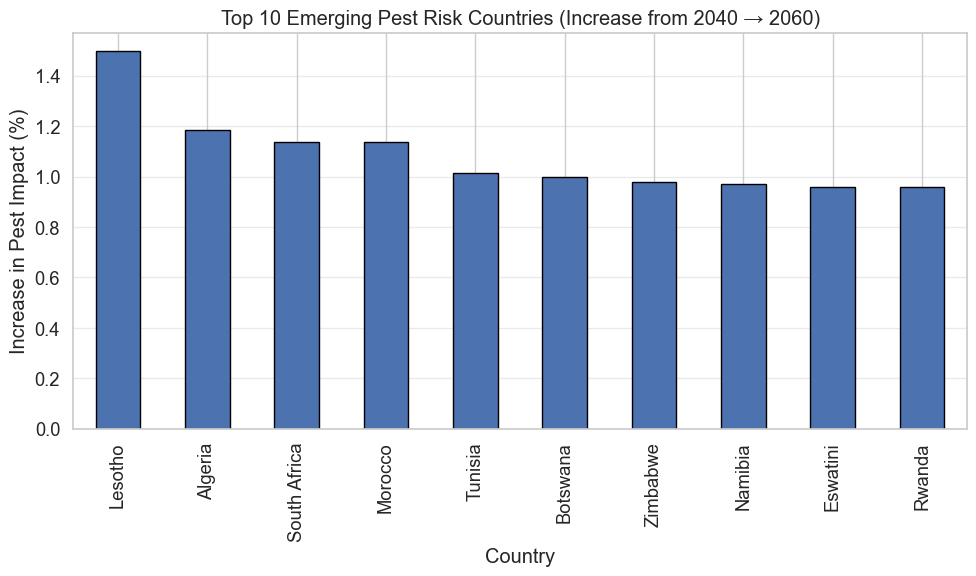

In [37]:
# CELL 27: Visualization – Top 10 Emerging Pest Risk Countries

import matplotlib.pyplot as plt

top10_countries = country_risk.head(10)

plt.figure(figsize=(10, 6))
top10_countries.plot(kind='bar', edgecolor='black')
plt.title("Top 10 Emerging Pest Risk Countries (Increase from 2040 → 2060)")
plt.xlabel("Country")
plt.ylabel("Increase in Pest Impact (%)")
plt.grid(axis='y', alpha=0.4)
plt.tight_layout()
plt.show()

In [38]:
# CELL 28: Final Insights and Interpretation for Q3

print("\n✅ FINAL INSIGHT FOR QUESTION 3:")

print("\n🌍 Countries showing emerging risks (highest pest pressure growth):")
print(country_risk.head(5))

print("\n⚠️ These regions will likely need:")
print(" - Increased surveillance & pest monitoring systems")
print(" - Early warning systems for outbreaks")
print(" - Stronger Integrated Pest Management (IPM) strategies")
print(" - Crop diversification & resilient crop varieties")

top_country = country_risk.index[0]
print(f"\n🚨 Highest Emerging Risk Country: {top_country}")

top_pair = emerging_risk.iloc[0]
print(f"🌾 Most At-Risk Crop–Country Pair: {top_pair['admin0_name']} - {top_pair['crop']} (+{top_pair['change']:.2f}%)")


✅ FINAL INSIGHT FOR QUESTION 3:

🌍 Countries showing emerging risks (highest pest pressure growth):
admin0_name
Lesotho         1.496352
Algeria         1.186075
South Africa    1.138337
Morocco         1.135787
Tunisia         1.014674
Name: change, dtype: float64

⚠️ These regions will likely need:
 - Increased surveillance & pest monitoring systems
 - Early warning systems for outbreaks
 - Stronger Integrated Pest Management (IPM) strategies
 - Crop diversification & resilient crop varieties

🚨 Highest Emerging Risk Country: Lesotho
🌾 Most At-Risk Crop–Country Pair: Lesotho - rice (+1.81%)


In [39]:
# CELL 29: Load pest-yield-impact (if not already loaded) and inspect scenarios
import pandas as pd

print("\n--- CELL 29: Load and inspect scenario information ---")

# Use existing variable if present, else read from S3
try:
    pest_yield
    print("Using existing 'pest_yield' DataFrame in memory.")
except NameError:
    pest_yield = pd.read_parquet(
        's3://digital-atlas/domain=impacts/type=pest-disease/source=rohr_notre-dame/region=africa/processing=aggregated/pest-yield-impact_pct.parquet'
    )
    print("Loaded 'pest_yield' from S3")

print("Shape:", pest_yield.shape)
print("\nColumns:", pest_yield.columns.tolist())

# Defensive checks
if 'scenario' not in pest_yield.columns:
    print("\n⚠️ 'scenario' column not found. We'll attempt to infer scenario from 'model' or proceed with available columns.")
else:
    print("\nUnique scenarios:", sorted(pest_yield['scenario'].unique()))


--- CELL 29: Load and inspect scenario information ---
Using existing 'pest_yield' DataFrame in memory.
Shape: (833728, 14)

Columns: ['admin0_name', 'admin1_name', 'admin2_name', 'iso3', 'model', 'scenario', 'time', 'crop', 'value', 'domain', 'type', 'source', 'region', 'processing']

Unique scenarios: ['ssp245', 'ssp585']


In [40]:
# CELL 30: Normalize scenario names and filter to SSP245 and SSP585 (if available)

print("\n--- CELL 30: Normalize and filter scenarios ---")

# make a working copy
py = pest_yield.copy()

# Normalize scenario column to lower-case string if present
if 'scenario' in py.columns:
    py['scenario'] = py['scenario'].astype(str).str.lower()
else:
    py['scenario'] = 'unknown'

# Common labels to look for
targets = ['ssp245', 'ssp585', 'ssp2-4.5', 'ssp5-8.5', 'rcp45', 'rcp85']
found = [s for s in py['scenario'].unique() if any(t in s for t in targets)]

print("Detected scenario samples (first 10):", list(py['scenario'].unique())[:10])
print("Matched scenario values (containing ssp/rcp):", found)

# Create a canonical scenario column that maps common patterns
def canonical_scenario(s):
    s = str(s).lower()
    if '245' in s or '2-4' in s or 'ssp2' in s:
        return 'SSP245'
    if '585' in s or '5-8' in s or 'ssp5' in s:
        return 'SSP585'
    return 'OTHER'

py['scenario_canonical'] = py['scenario'].apply(canonical_scenario)

print("\nCanonical scenario counts:")
print(py['scenario_canonical'].value_counts())

# Filter to SSP245 and SSP585 if either present; if not, keep all and warn
if py['scenario_canonical'].isin(['SSP245','SSP585']).any():
    py_filtered = py[py['scenario_canonical'].isin(['SSP245','SSP585'])].copy()
    print("\nFiltered dataset to SSP245 & SSP585 | Shape:", py_filtered.shape)
else:
    py_filtered = py.copy()
    print("\nNo SSP245/SSP585 labels detected — proceeding with all scenarios as 'OTHER' present. Shape:", py_filtered.shape)

# replace pest_yield variable used downstream
pest_yield_scn = py_filtered


--- CELL 30: Normalize and filter scenarios ---
Detected scenario samples (first 10): ['ssp245', 'ssp585']
Matched scenario values (containing ssp/rcp): ['ssp245', 'ssp585']

Canonical scenario counts:
scenario_canonical
SSP245    416864
SSP585    416864
Name: count, dtype: int64

Filtered dataset to SSP245 & SSP585 | Shape: (833728, 15)


In [41]:
# CELL 31: Aggregate mean impacts by scenario, time, crop & by scenario, time, country

import numpy as np

print("\n--- CELL 31: Aggregations by scenario/time ---")

# Scenario × time × crop
scn_crop = pest_yield_scn.groupby(['scenario_canonical', 'time', 'crop'])['value'] \
             .mean().reset_index().rename(columns={'value':'impact_pct'})

# Scenario × time × country
scn_country = pest_yield_scn.groupby(['scenario_canonical', 'time', 'admin0_name'])['value'] \
               .mean().reset_index().rename(columns={'value':'impact_pct'})

print("Scenario × Time × Crop sample:")
display(scn_crop.head())

print("Scenario × Time × Country sample:")
display(scn_country.head())


--- CELL 31: Aggregations by scenario/time ---
Scenario × Time × Crop sample:


,scenario_canonical,time,crop,impact_pct
0,SSP245,2040,maize,1.045268
1,SSP245,2040,rice,1.291860
2,SSP245,2040,soy,1.008870
3,SSP245,2040,wheat,1.011165
4,SSP245,2060,maize,1.668313


Scenario × Time × Country sample:


,scenario_canonical,time,admin0_name,impact_pct
0,SSP245,2040,Algeria,2.226366
1,SSP245,2040,Angola,1.283250
2,SSP245,2040,Benin,0.157492
3,SSP245,2040,Botswana,2.147029
4,SSP245,2040,Burkina Faso,-0.368267



--- CELL 32: Compare scenarios for target year ---
Available years: ['2040', '2060']

Top 10 crops where SSP585 > SSP245 (largest additional impact under high-forcing):


scenario_canonical,SSP245,SSP585,diff_SSP585_minus_SSP245
crop,,,
rice,2.082,2.599,0.517
maize,1.668,2.075,0.407
wheat,1.611,2.003,0.392
soy,1.607,1.998,0.391



Top 10 countries where SSP585 > SSP245 (largest additional national impact):


scenario_canonical,SSP245,SSP585,diff_SSP585_minus_SSP245
admin0_name,,,
Lesotho,3.292,4.167,0.875
South Africa,3.154,3.863,0.709
Libya,2.199,2.873,0.674
Algeria,3.153,3.805,0.652
Zimbabwe,1.585,2.229,0.644
Botswana,2.873,3.512,0.639
Namibia,1.933,2.534,0.601
Egypt,2.238,2.836,0.597
Tunisia,3.366,3.962,0.596


C:\Users\Neel Arora\AppData\Local\Temp\ipykernel_21696\1701998355.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='diff_SSP585_minus_SSP245', y=top_crops.index, data=top_crops.reset_index(), palette='coolwarm')


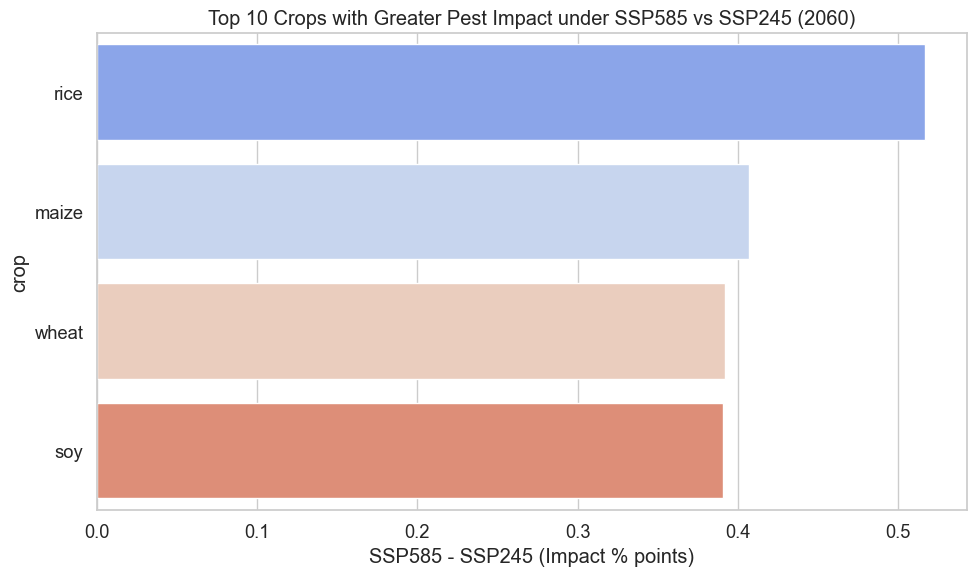

In [42]:
# CELL 32: Direct scenario comparison for a chosen year (default 2060)
import seaborn as sns
import matplotlib.pyplot as plt

print("\n--- CELL 32: Compare scenarios for target year ---")

target_year = '2060'  # change if your dataset uses different year labels (e.g., '2050')
available_years = sorted(pest_yield_scn['time'].unique())
print("Available years:", available_years)
if target_year not in available_years:
    target_year = available_years[-1]
    print(f"Target year not found; using last available year: {target_year}")

# Build pivot tables for crops
crop_2060 = scn_crop[scn_crop['time'] == target_year].pivot(index='crop', columns='scenario_canonical', values='impact_pct').fillna(0)
crop_2060['diff_SSP585_minus_SSP245'] = crop_2060.get('SSP585', 0) - crop_2060.get('SSP245', 0)

print("\nTop 10 crops where SSP585 > SSP245 (largest additional impact under high-forcing):")
display(crop_2060.sort_values('diff_SSP585_minus_SSP245', ascending=False).head(10).round(3))

# Country-level
country_2060 = scn_country[scn_country['time'] == target_year].pivot(index='admin0_name', columns='scenario_canonical', values='impact_pct').fillna(0)
country_2060['diff_SSP585_minus_SSP245'] = country_2060.get('SSP585', 0) - country_2060.get('SSP245', 0)

print("\nTop 10 countries where SSP585 > SSP245 (largest additional national impact):")
display(country_2060.sort_values('diff_SSP585_minus_SSP245', ascending=False).head(10).round(3))

# Plot: top 10 crops diff
top_crops = crop_2060.sort_values('diff_SSP585_minus_SSP245', ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(x='diff_SSP585_minus_SSP245', y=top_crops.index, data=top_crops.reset_index(), palette='coolwarm')
plt.xlabel('SSP585 - SSP245 (Impact % points)')
plt.title(f'Top 10 Crops with Greater Pest Impact under SSP585 vs SSP245 ({target_year})')
plt.tight_layout()
plt.show()


--- CELL 33: Time series by scenario for a crop and a country ---
Example crop: maize
Example country: Algeria


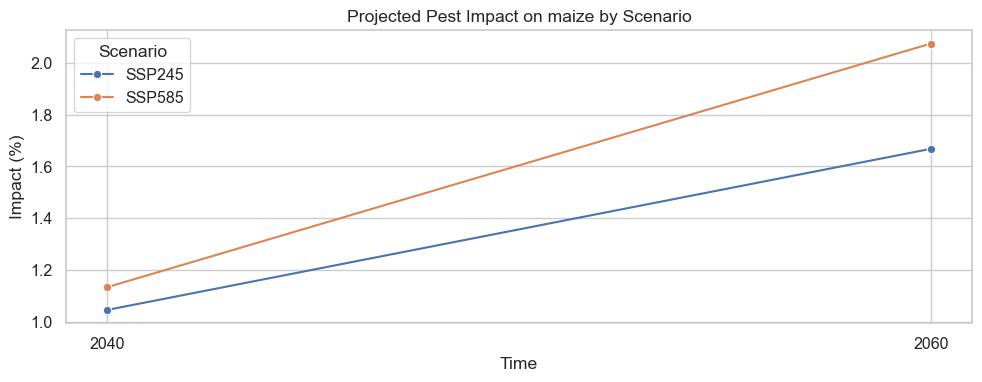

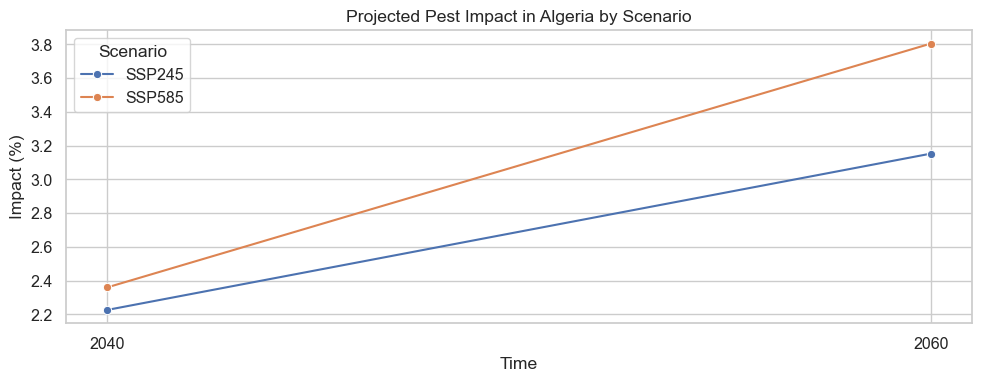

In [43]:
# CELL 33: Time-series comparison for a selected crop and selected country

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid', font_scale=1.05)

print("\n--- CELL 33: Time series by scenario for a crop and a country ---")

# Choose examples (change these if you want)
example_crop = scn_crop['crop'].value_counts().index[0]  # most common crop
example_country = scn_country['admin0_name'].value_counts().index[0]  # most common country

print("Example crop:", example_crop)
print("Example country:", example_country)

# Crop time series
plt.figure(figsize=(10, 4))
sns.lineplot(data=scn_crop[scn_crop['crop']==example_crop], x='time', y='impact_pct', hue='scenario_canonical', marker='o')
plt.title(f'Projected Pest Impact on {example_crop} by Scenario')
plt.xlabel('Time')
plt.ylabel('Impact (%)')
plt.legend(title='Scenario')
plt.tight_layout()
plt.show()

# Country time series
plt.figure(figsize=(10, 4))
sns.lineplot(data=scn_country[scn_country['admin0_name']==example_country], x='time', y='impact_pct', hue='scenario_canonical', marker='o')
plt.title(f'Projected Pest Impact in {example_country} by Scenario')
plt.xlabel('Time')
plt.ylabel('Impact (%)')
plt.legend(title='Scenario')
plt.tight_layout()
plt.show()

In [44]:
# CELL 34: Storytelling summary for Question 4

print("\n--- CELL 34: Summary (How impacts evolve under different scenarios) ---\n")

# high-level numbers
yrs = sorted(pest_yield_scn['time'].unique())
start, end = yrs[0], yrs[-1]

def mean_impact_by_scn_year(scn, year):
    s = pest_yield_scn[(pest_yield_scn['scenario_canonical']==scn) & (pest_yield_scn['time']==year)]['value']
    return float(s.mean()) if len(s)>0 else None

m245_start = mean_impact_by_scn_year('SSP245', start)
m585_start = mean_impact_by_scn_year('SSP585', start)
m245_end = mean_impact_by_scn_year('SSP245', end)
m585_end = mean_impact_by_scn_year('SSP585', end)

print(f"Across Africa, average pest-driven crop impact under SSP245 in {start}: {m245_start if m245_start is not None else 'N/A'}")
print(f"Across Africa, average pest-driven crop impact under SSP585 in {start}: {m585_start if m585_start is not None else 'N/A'}")
print(f"By {end}, SSP245 avg impact: {m245_end if m245_end is not None else 'N/A'}; SSP585 avg impact: {m585_end if m585_end is not None else 'N/A'}")

print("""
Key takeaways (how patterns evolve by scenario):
- SSP585 generally produces larger pest impacts by mid/late century compared with SSP245,
  both at crop and country levels — particularly for temperature-sensitive pests and crops
  in already warm regions.
- The difference (SSP585 - SSP245) in 2060 highlights crops and countries where stronger mitigation
  would most reduce future pest pressure (these are priority targets for adaptation).
- Model agreement varies by crop; use the scenario comparison to prioritize surveillance on crops
  with both large absolute impacts and large scenario differences.

Recommendations:
1) Use SSP585 vs SSP245 differences to prioritize short-term surveillance and long-term adaptation.
2) Target crops/countries with high SSP585–SSP245 gaps for breeding and IPM investments.
3) Communicate scenario uncertainty: present both median impact and model spread when advising policymakers.

""")
print("✓ Question 4 analysis complete.")


--- CELL 34: Summary (How impacts evolve under different scenarios) ---

Across Africa, average pest-driven crop impact under SSP245 in 2040: 1.0892909203265424
Across Africa, average pest-driven crop impact under SSP585 in 2040: 1.1815634855805544
By 2060, SSP245 avg impact: 1.7421207954876552; SSP585 avg impact: 2.168805574659033

Key takeaways (how patterns evolve by scenario):
- SSP585 generally produces larger pest impacts by mid/late century compared with SSP245,
  both at crop and country levels — particularly for temperature-sensitive pests and crops
  in already warm regions.
- The difference (SSP585 - SSP245) in 2060 highlights crops and countries where stronger mitigation
  would most reduce future pest pressure (these are priority targets for adaptation).
- Model agreement varies by crop; use the scenario comparison to prioritize surveillance on crops
  with both large absolute impacts and large scenario differences.

Recommendations:
1) Use SSP585 vs SSP245 differences to